<a href="https://colab.research.google.com/github/P-Saha/k-NN_and_Clustering_Analysis/blob/QKZhao/Datathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup, Data Import, and Pre-processing

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import io

dfObesity = pd.read_csv('https://raw.githubusercontent.com/P-Saha/k-NN_and_Clustering_Analysis/main/BMI_Dataset.csv')
dfCancer = pd.read_csv('https://raw.githubusercontent.com/P-Saha/k-NN_and_Clustering_Analysis/main/Lung_Cancer_Dataset.csv')


In [13]:
dfCancer.head()


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [14]:
dfObesity.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


**[Note to Delete]**

#Summary of Analysis Plan from 20230920 - Kinna's part:

For the Canadian BMI/Obesity dataset:
  - address any missing data [done]
  - most variables were continuous or ordinal
    - check normality using histogram [done] and qqplot [did Shapiro-Wilk test instead]
    - normalize these continuous variables for KNN and K-means in later sections  
      **[please check the "Testing normality in the Canadian obesity data" section. Continuous data were not normally distributetd]**



For the Ethiopian Canger dataset:
  - address any missing data [done]
  - figure out 1/2 assignment for gender
    [Note: number of 1's and 2's were counted in the open-source data file. There were 872 of 1's and 593 of 2's, which corresponds to 872 women and 593 men reported in the paper]
    - then convert 1/2 to 0/1 [done]
  - bin the age data


Additional exploratory analysis for both datasets:
- scatterplot e.g. BMI vs ???
- histogram
- gender stratified results

**[Note to Delete]**

# Exploratory Data Analysis and Visualization
In this section we create various plots to visualise the data in order to have a general initial understanding of the datasets and identify clear or obvious patterns and trends in the dataset.


## Obesity Dataset

In [15]:
# Pre-processing of Obseity Dataset

var_obsese = list(dfObesity.columns)
print(var_obsese)

print("Missing Value Distribution:")
print(dfObesity.isnull().mean())
print("")

['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI']
Missing Value Distribution:
Age                    0.0
Gender                 0.0
Calorie_Intake         0.0
Sugar_Intake           0.0
Physical_Activity      0.0
Fast_Food_Frequency    0.0
Screen_Time            0.0
Height                 0.0
Weight                 0.0
BMI                    0.0
dtype: float64



Based on information obtained above, this dataset does not contain any missing values.

**[note to be deleted]:** as discussed during the meeting on 20230920, the height and weight will not be removed during the data cleaning process. Instead, multi-collinearity will be tested in later sections.

In [16]:
# Descriptive Statistics
print(dfObesity.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In the obsesity dataset, the following variables were continuous: Age, Calorie_Intake, Sugar_Intake, Physical_Activity,Fast_Food_Frequency, Screen_Time, Height, Weight, BMI. These variables exhibited notable differences in magnitude. Therefore, to avoid potential biases towards variables with higher magnitudes, all continous variables were normalized before applying the KNN algorithm.

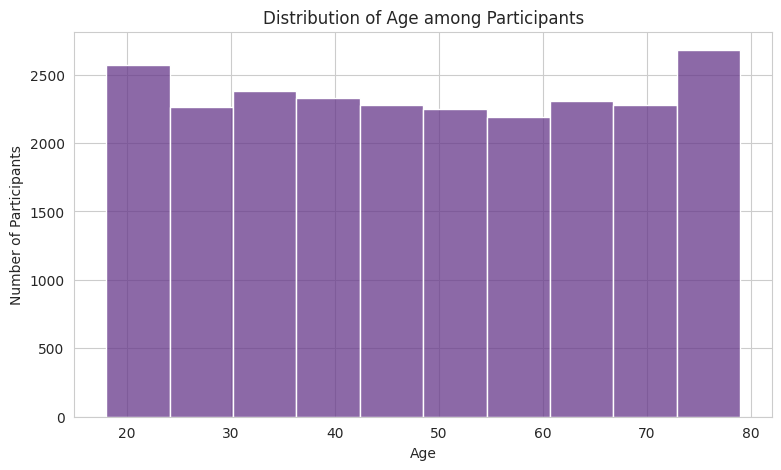

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.954, p=0.000
Sample does not look Gaussian, thus reject H0


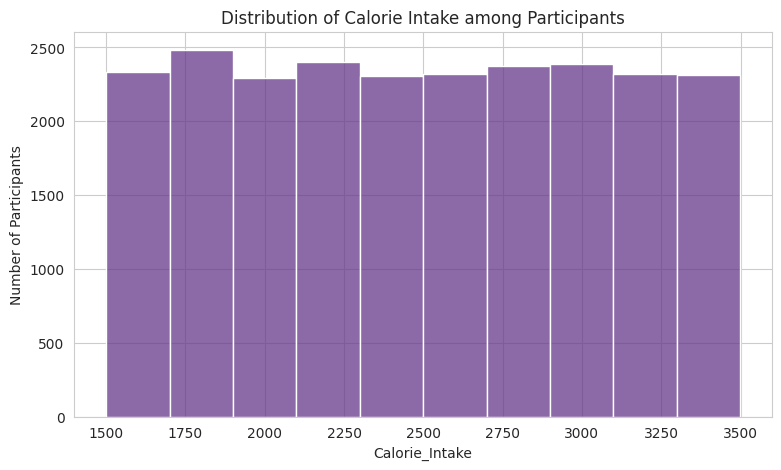

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.955, p=0.000
Sample does not look Gaussian, thus reject H0


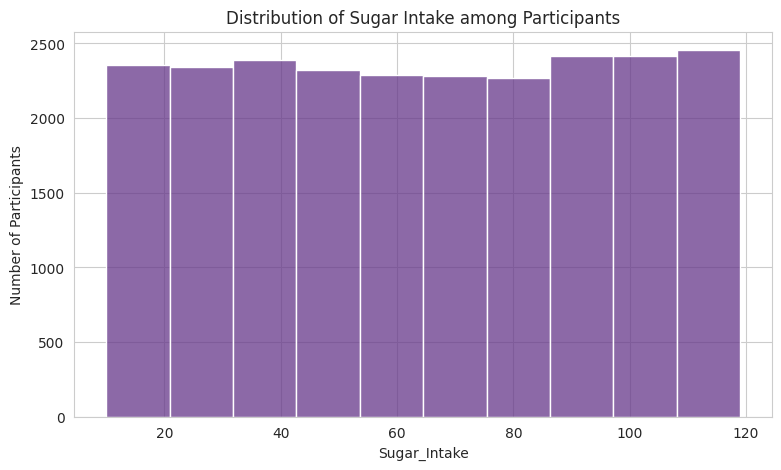

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.952, p=0.000
Sample does not look Gaussian, thus reject H0


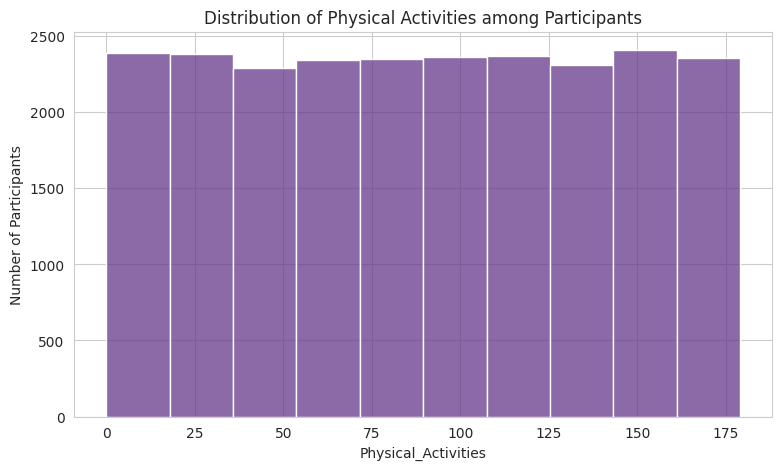

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.954, p=0.000
Sample does not look Gaussian, thus reject H0


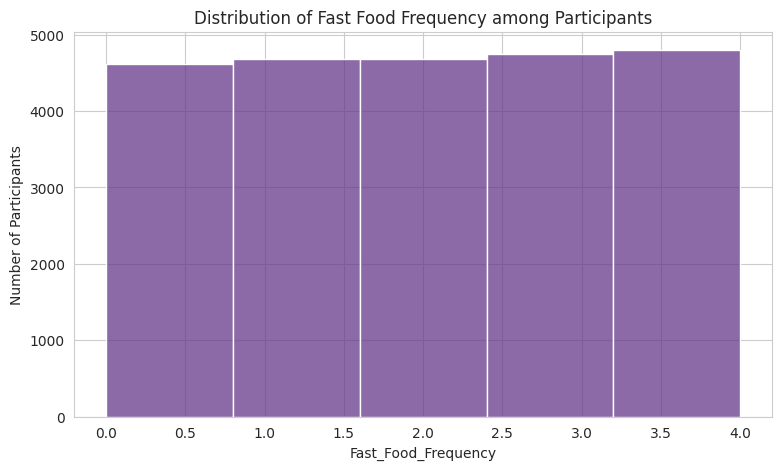

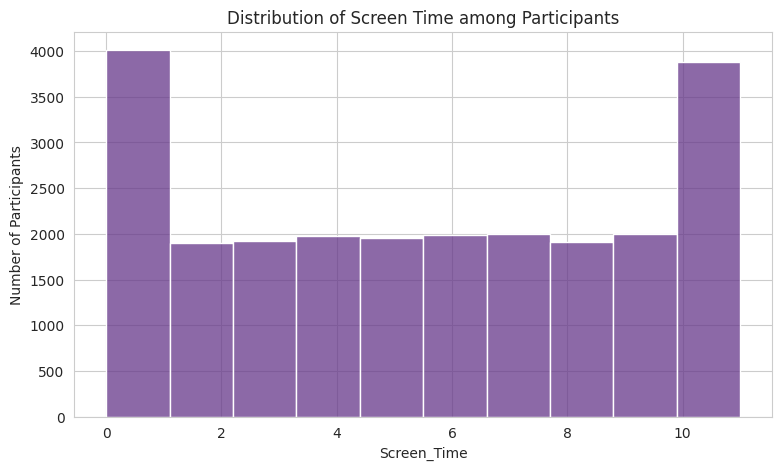

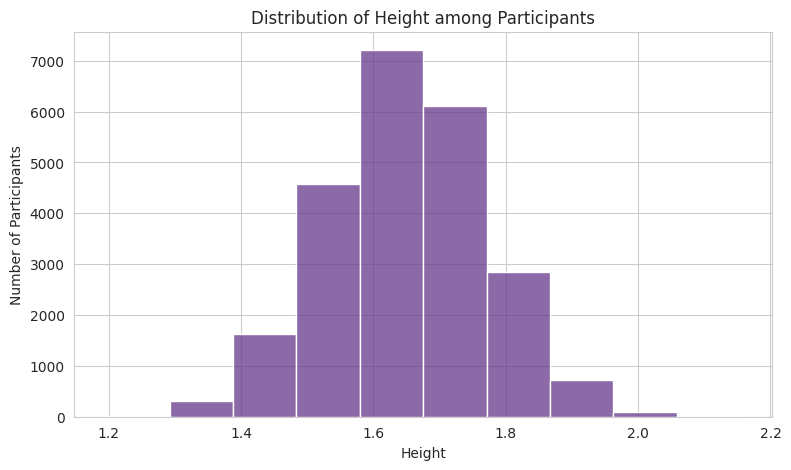

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=1.000, p=0.869
Sample looks Gaussian, thus failed to reject H0


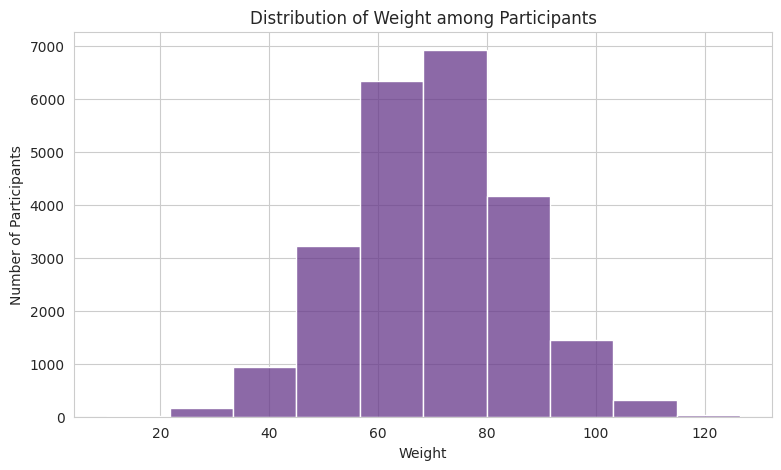

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=1.000, p=0.388
Sample looks Gaussian, thus failed to reject H0


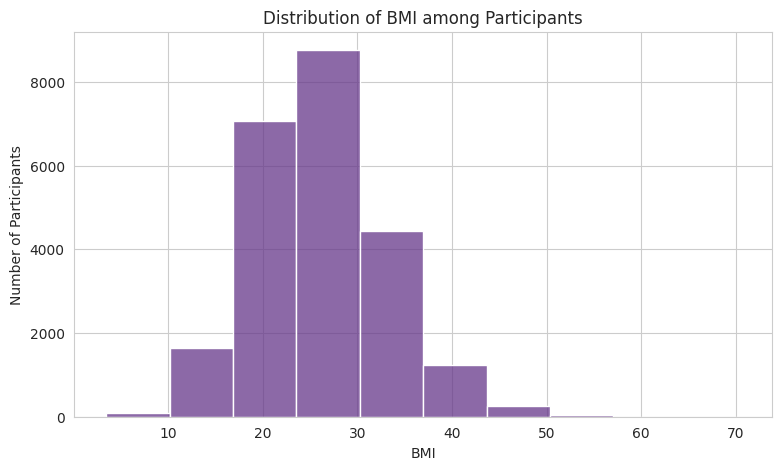

Statistics=0.989, p=0.000
Sample does not look Gaussian, thus reject H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
##Testing normality in the Canadian obesity data

import random
from scipy.stats import shapiro

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Age'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Age among Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
#Similar method was applied to the remaining continuous variables:

##Caloric Intake
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Calorie_Intake'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Calorie Intake among Participants')
plt.xlabel('Calorie_Intake')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Calorie_Intake)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Sugar Intake
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Sugar_Intake'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Sugar Intake among Participants')
plt.xlabel('Sugar_Intake')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Sugar_Intake)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Physical Activity
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Physical_Activity'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Physical Activities among Participants')
plt.xlabel('Physical_Activities')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Physical_Activity)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")


########################################################################
##Fast Food Frequency
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Fast_Food_Frequency'], bins=5, kde=False, color='#66378a')
plt.title('Distribution of Fast Food Frequency among Participants')
plt.xlabel('Fast_Food_Frequency')
plt.ylabel('Number of Participants')
plt.show() #ordinal

########################################################################
##Screen Time
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Screen_Time'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Screen Time among Participants')
plt.xlabel('Screen_Time')
plt.ylabel('Number of Participants')
plt.show() #ordinal

########################################################################
##Height
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Height'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Height among Participants')
plt.xlabel('Height')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Height)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##Weight
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['Weight'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Weight among Participants')
plt.xlabel('Weight')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.Weight)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

########################################################################
##BMI
plt.figure(figsize=(9, 5))
sns.histplot(dfObesity['BMI'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of BMI among Participants')
plt.xlabel('BMI')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfObesity.BMI)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

In [22]:
#scalar transformation in case it's still needed:

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
dfObsesity_transformed = scalar.fit_transform(dfObesity.select_dtypes(include=['number']))

dfObsesity_transformed = pd.DataFrame(dfObsesity_transformed,columns =dfObesity.select_dtypes(include=['number']).columns)
print(dfObsesity_transformed.describe()) #scaled variables (might have included ordinal data (fast food frequency and screen time) as well)

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  2.353500e+04    2.353500e+04  2.353500e+04       2.353500e+04   
mean   8.272305e-17   -1.947313e-16 -9.057269e-19      -2.807753e-17   
std    1.000021e+00    1.000021e+00  1.000021e+00       1.000021e+00   
min   -1.708392e+00   -1.723553e+00 -1.713055e+00      -1.717138e+00   
25%   -8.691072e-01   -8.737581e-01 -8.694094e-01      -8.537406e-01   
50%   -2.982222e-02   -1.463576e-03  5.481845e-03       9.656482e-03   
75%    8.654151e-01    8.621773e-01  8.803731e-01       8.730536e-01   
max    1.704700e+00    1.736203e+00  1.692772e+00       1.717264e+00   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         2.353500e+04  2.353500e+04  2.353500e+04  2.353500e+04   
mean          1.017433e-16 -1.068758e-16  3.151930e-16  9.618819e-16   
std           1.000021e+00  1.000021e+00  1.000021e+00  1.000021e+00   
min          -1.426859e+00 -1.588357e+00 -3.794054e+00 -3.99620

## Lung Cancer Dataset

In [ ]:
# Examining Missing Data

var_cancer = list(dfCancer.columns)
print(var_cancer)

print("Missing Value Distribution:")
print(dfCancer.isnull().mean())
print("")

['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk', 'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Severity']
Missing Value Distribution:
Age                  0.0
Gender               0.0
Air Pollution        0.0
Alcohol Usage        0.0
Genetic Risk         0.0
Lung Disease         0.0
Obesity              0.0
Smoking              0.0
Passive Smoker       0.0
Chest Pain           0.0
Coughing of Blood    0.0
Severity             0.0
dtype: float64



Again, the output above confirmed that there was no missing values from the Ethiopian cancer dataset.

In [23]:
# Descriptive Statistics
print(dfCancer.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

The sample size for
In the cancer dataset, most variables were categorical/ordinal with similar number of ordinal levels. Instead of scaling the continuous age data, as seen with the obsesity dataset, the data on age were binned to 8 categories before applying the K-means algorithm.


In [54]:
#transforming gender from 1/2 to 0/1
#0 = female, 1 = male
dfCancer["Gender_modified"] = dfCancer["Gender"] - 1

#binning of age into roughly 8 categories
#since the age range is 14 to 73

for index, row in dfCancer.iterrows():
    Age = row['Age']
    if 14 <= Age <= 21:
      dfCancer.loc[index, "Age_Modified"] = 1
    elif 22 <= Age <= 29:
      dfCancer.loc[index, "Age_Modified"] = 2
    elif 30 <= Age <= 37:
      dfCancer.loc[index, "Age_Modified"] = 3
    elif 38 <= Age <= 45:
      dfCancer.loc[index, "Age_Modified"] = 4
    elif 46 <= Age <= 53:
      dfCancer.loc[index, "Age_Modified"] = 5
    elif 54 <= Age <= 61:
      dfCancer.loc[index, "Age_Modified"] = 6
    elif 62 <= Age <= 69:
      dfCancer.loc[index, "Age_Modified"] = 7
    elif 70 <= Age:
      dfCancer.loc[index, "Age_Modified"] = 8


print(dfCancer.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

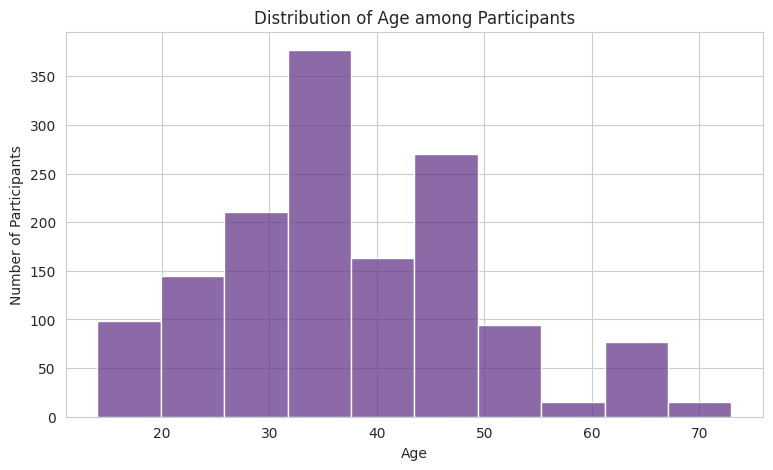

Statistics=0.970, p=0.000
Sample does not look Gaussian, thus reject H0


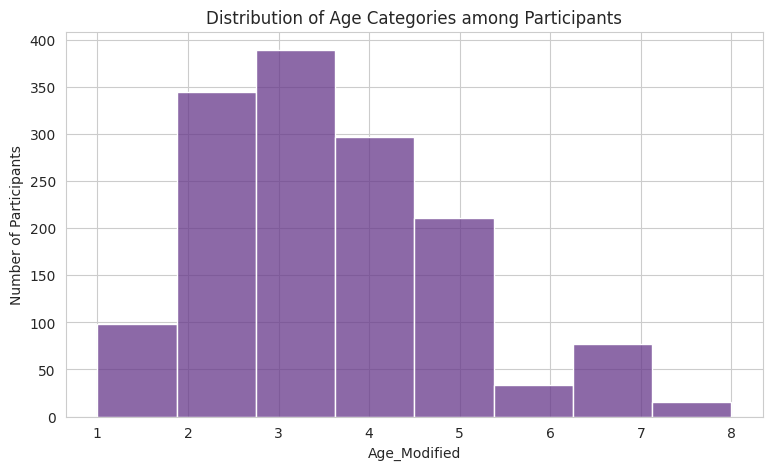

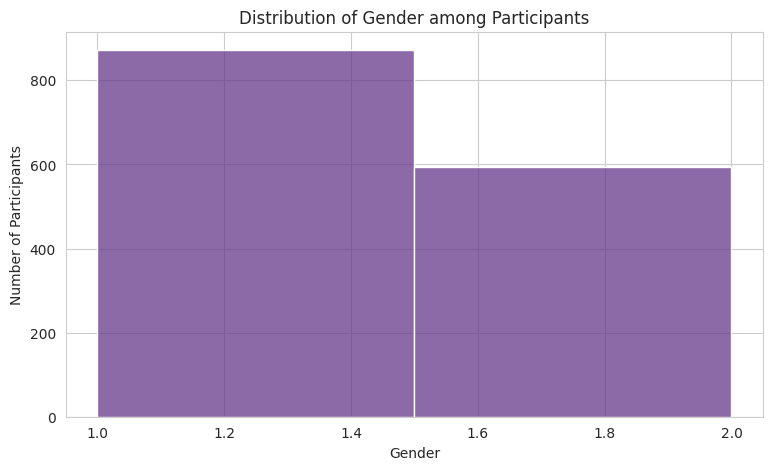

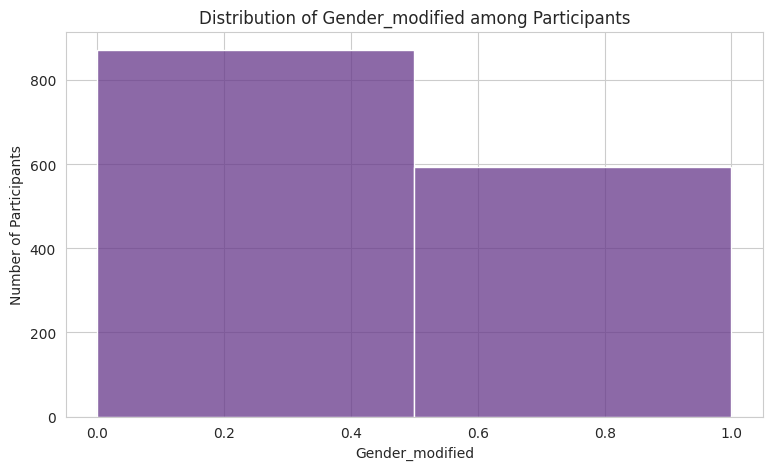

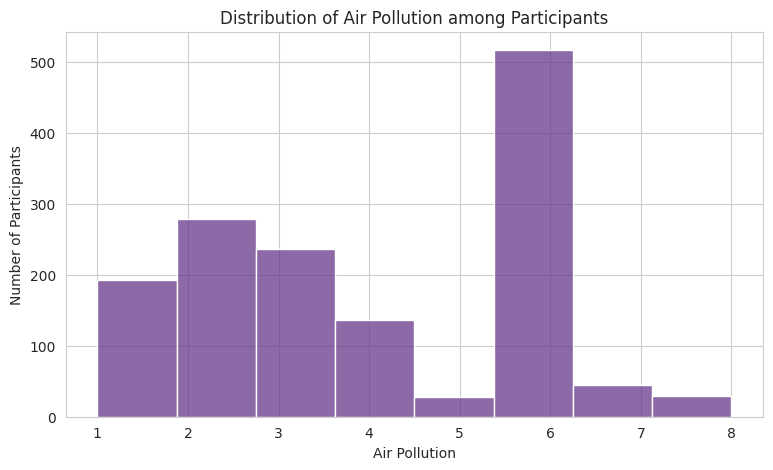

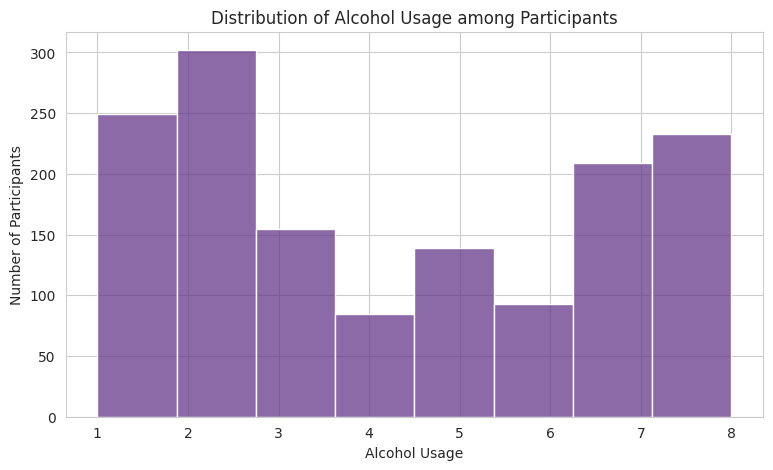

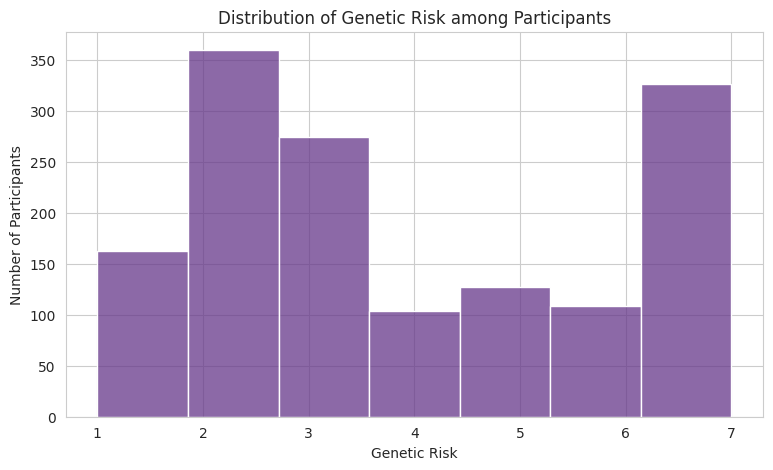

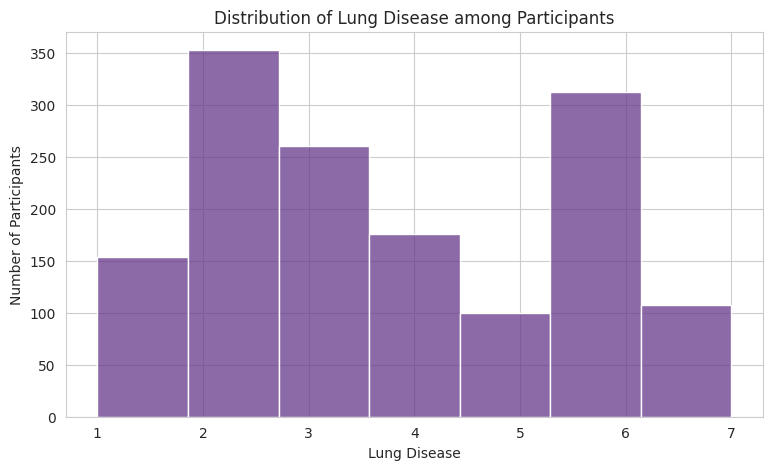

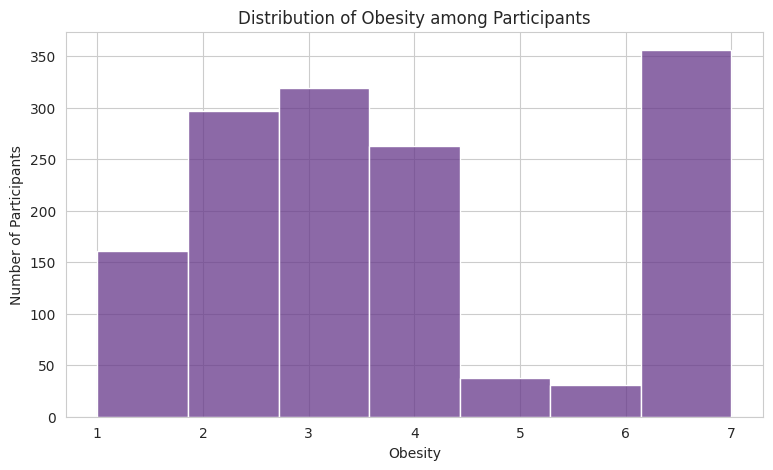

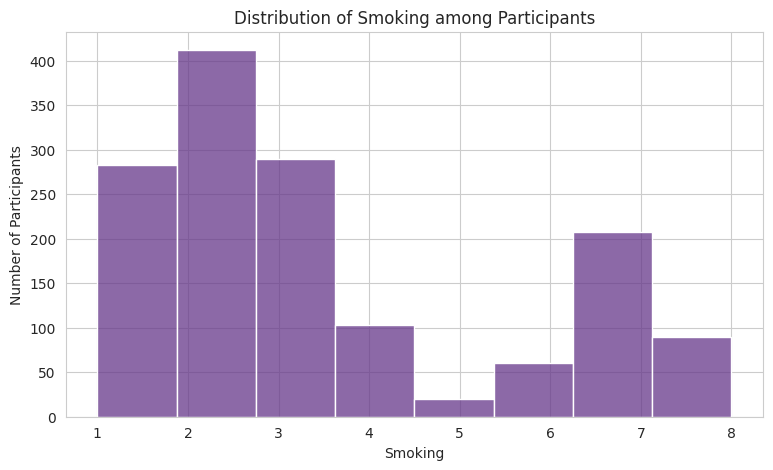

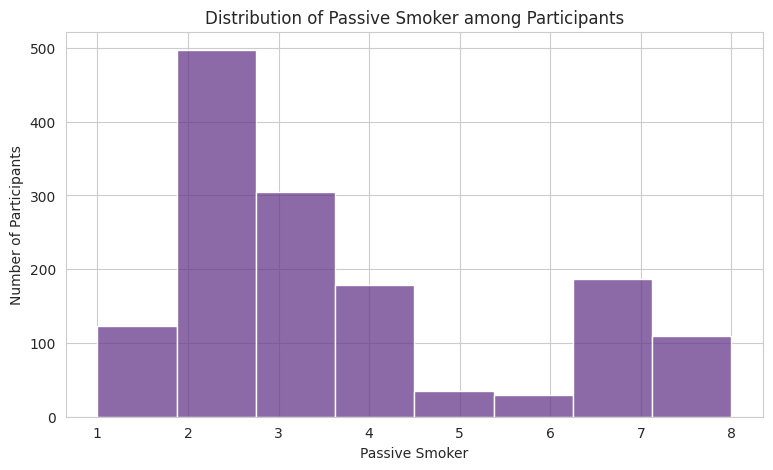

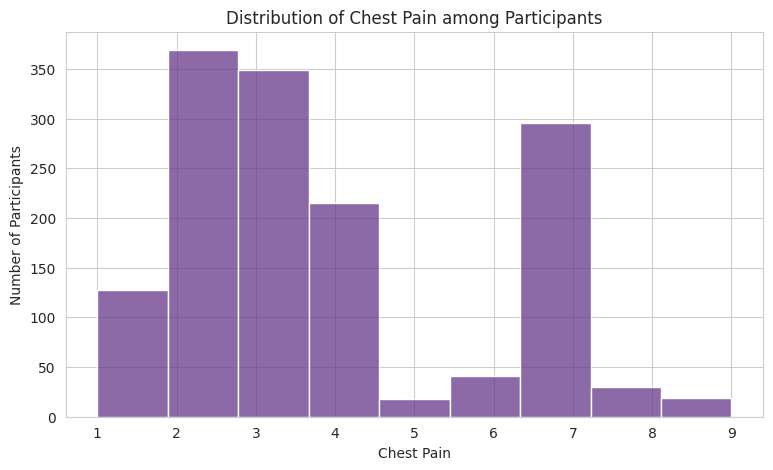

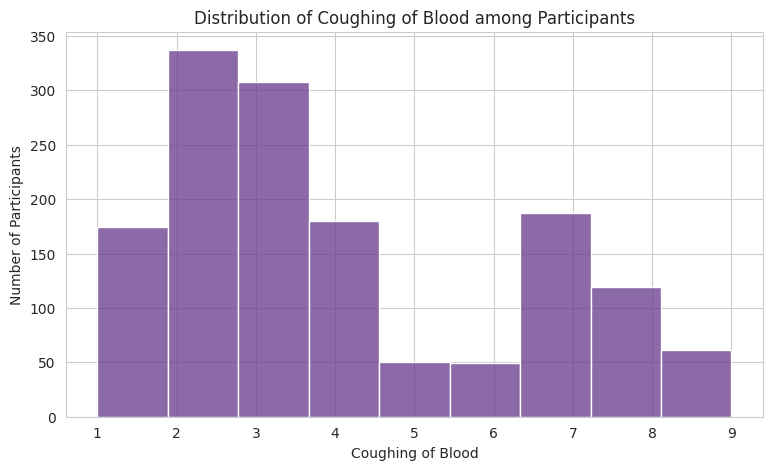

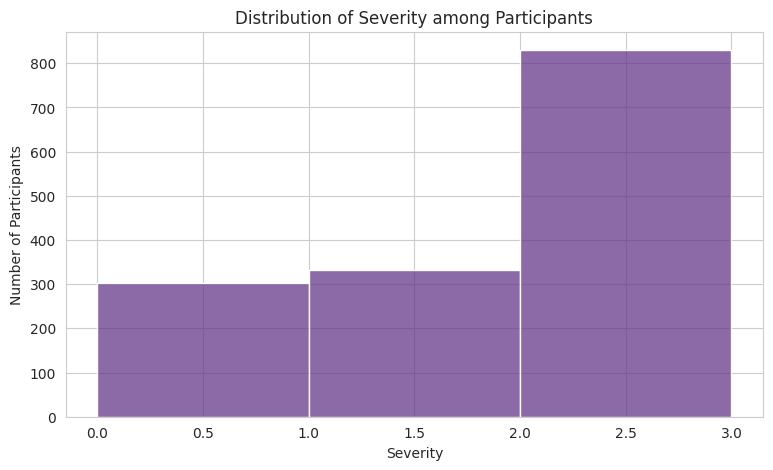

In [55]:
#Plotting histogram for all variables

##Age
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Age'], bins=10, kde=False, color='#66378a')
plt.title('Distribution of Age among Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show() #continuous

#Shapiro-Wilk test for normality
stat,p=shapiro(dfCancer.Age)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
    print("Sample looks Gaussian, thus failed to reject H0")
else:
    print("Sample does not look Gaussian, thus reject H0")

#Age_Modified
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Age_Modified'], bins=8, kde=False, color='#66378a')
plt.title('Distribution of Age Categories among Participants')
plt.xlabel('Age_Modified')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Gender
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Gender'], bins=2, kde=False, color='#66378a')
plt.title('Distribution of Gender among Participants')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show() #categorical

##Gender_modified
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Gender_modified'], bins=2, kde=False, color='#66378a')
plt.title('Distribution of Gender_modified among Participants')
plt.xlabel('Gender_modified')
plt.ylabel('Number of Participants')
plt.show() #categorical

##################################################################
##Air Pollution
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Air Pollution'], bins=8, kde=False, color='#66378a')
plt.title('Distribution of Air Pollution among Participants')
plt.xlabel('Air Pollution')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Alcohol Usage
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Alcohol Usage'], bins=8, kde=False, color='#66378a')
plt.title('Distribution of Alcohol Usage among Participants')
plt.xlabel('Alcohol Usage')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Genetic Risk
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Genetic Risk'], bins=7, kde=False, color='#66378a')
plt.title('Distribution of Genetic Risk among Participants')
plt.xlabel('Genetic Risk')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Lung Disease
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Lung Disease'], bins=7, kde=False, color='#66378a')
plt.title('Distribution of Lung Disease among Participants')
plt.xlabel('Lung Disease')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Obesity
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Obesity'], bins=7, kde=False, color='#66378a')
plt.title('Distribution of Obesity among Participants')
plt.xlabel('Obesity')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Smoking
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Smoking'], bins=8, kde=False, color='#66378a')
plt.title('Distribution of Smoking among Participants')
plt.xlabel('Smoking')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Passive Smoking
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Passive Smoker'], bins=8, kde=False, color='#66378a')
plt.title('Distribution of Passive Smoker among Participants')
plt.xlabel('Passive Smoker')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Chest Pain
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Chest Pain'], bins=9, kde=False, color='#66378a')
plt.title('Distribution of Chest Pain among Participants')
plt.xlabel('Chest Pain')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Coughing of Blood
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Coughing of Blood'], bins=9, kde=False, color='#66378a')
plt.title('Distribution of Coughing of Blood among Participants')
plt.xlabel('Coughing of Blood')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################
##Severity
plt.figure(figsize=(9, 5))
sns.histplot(dfCancer['Severity'], bins=3, kde=False, color='#66378a')
plt.title('Distribution of Severity among Participants')
plt.xlabel('Severity')
plt.ylabel('Number of Participants')
plt.show() #ordinal

##################################################################


# Linear Regression Models

In this section we use linear regression models to determine how the different predictors affect the response variables.

## BMI Dataset

In [ ]:
lmBMI = LinearRegression().fit()

TypeError: ignored

## Lung Cancer Dataset

# k-NN Prediction Models

## BMI dataset

## Lung Cancer Dataset

In [ ]:
# Preprocess the data
# Encoding 'Sex' column
le = LabelEncoder()
dfCancer[] = le.fit_transform(df['Sex'])  # Male: 1, Female: 0

# Split data into features and label
X = df[['Age', 'Sex', 'Stress_Score', 'Anxiety_Level']]
y = df['Mental_Wellbeing']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: ignored

# k-Means Clustering


In [ ]:
# Load the dataset
df = pd.read_csv('insurance.csv')
df.head()

# Check for missing values in the dataset
print(df.isna().sum())

# Display the data types of each column
df.dtypes